<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Spring 2021<br>
            Dr. Eric Van Dusen <br>
        Shashank Dalmia</p></td></tr>
</table>

# Lecture 3: Supply

In [23]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from utils import *
plt.style.use('seaborn-muted')
import sympy

In [44]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import patches
import csaps

## The Supply Curve

The supply of a commodity refers to the quantity for which producers or sellers are willing produce and offer for sale, at a particular price in some given period of time.

To answer questions like *"at a given price, what will be the supply of a good in the market?"*, we need to know the market supply curve. A supply curve is simply a curve (or graph) which shows the quantites of a good that can be produced and the prices they will be sold at.

It is good to discern between individual and market supply. **Individual supply** refers to the supply offered by a single firm or producer, while **market supply** refers to the supply offered by all the firms or producers in a market. It is the horizontal summation of the individual supply curves in the market.

The following table and graph will give an example of a market with two firm: A and B.

In [25]:
market_supply = Table().with_columns("Price", make_array(2, 3, 4),
                                     "Quantity supplied by A", make_array(20, 30, 40),
                                     "Quantity supplied by B", make_array(30, 40, 50),
                                     "Market Supply", make_array(50, 70, 90))
market_supply

Price,Quantity supplied by A,Quantity supplied by B,Market Supply
2,20,30,50
3,30,40,70
4,40,50,90


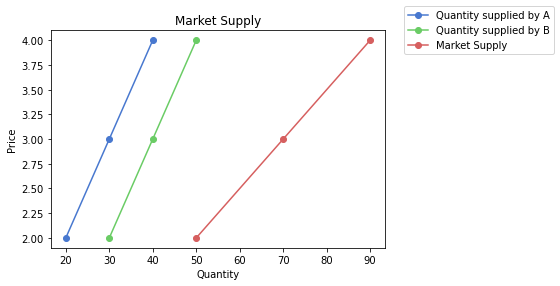

In [26]:
plt.plot(market_supply.column(1), market_supply.column(0), marker='o')
plt.plot(market_supply.column(2), market_supply.column(0), marker='o')
plt.plot(market_supply.column(3), market_supply.column(0), marker='o')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Market Supply')
plt.legend(make_array("Quantity supplied by A","Quantity supplied by B","Market Supply"), bbox_to_anchor=(1.04,1), loc="center left")

plt.show()

Market behaviour relating to supply is based on the behaviour of the individual firms that comprise it. Now, how does an individual firm make its decision about production?

It does so based on the costs associated with production. If the price of a good is enough to recover the costs, the firm produces. Generally, costs increase with the quantity of production. So, to induce producers to increase the quantity supplied, the prices need to increase to compensate for the increased costs.

## Costs and Firm Behavior

We will split costs into two categories: **Fixed costs** and **Variable costs**.

Fixed Costs are costs associated with fixed factors (or inputs) of production. For example, land for a factory, capital equipment like machinery, etc. The quantity of these inputs cannot be changed quickly in the short term. A factory owner cannot purchase land quickly enough to ramp up production in a week. A key point to note is that fixed costs are irrespective of the quantity, i.e., they do not change with the quantity produced.

Variable Costs are costs associated with variable factors (or inputs) of production. For example, labor, raw materials, etc. The quantity of these inputs can be changed quickly in the short term to adjust supply. A factory owner can hire more laborers or purchase more raw material to increase output. Variable costs change as the supply changes.

We will create a table with the following firm costs:

* **Output:** Units produced and supplied
* **Total Fixed Cost (TFC):** Cost incurred by firm on usage of all fixed factors.
* **Total Variable Cost (TVC):** Cost incurred by firm on usage of all variable factors.
* **Total Cost (TC):** Sum of the total fixed and variable costs
* **Marginal Cost (MC):** Addition to total cost as one more unit of output is produced
* **Average Fixed Cost (AFC):** Cost per unit of fixed factors
* **Average Variable Cost (AVC):** Cost per unit of variable factors
* **Average Total Cost (ATC):** Total cost per unit

In [27]:
individual_firm_costs = Table.read_table('individual_firm_costs.csv')
individual_firm_costs.show()

Output,Total Fixed Cost,Total Variable Cost
0,50,0
1,50,50
2,50,78
3,50,98
4,50,112
5,50,130
6,50,150
7,50,175
8,50,204
9,50,242


First, let's calculate `total_cost`, which is the sum of total fixed cost and total variable cost.

In [28]:
total_cost = individual_firm_costs.column("Total Fixed Cost") + individual_firm_costs.column("Total Variable Cost")
total_cost

array([ 50, 100, 128, 148, 162, 180, 200, 225, 254, 292, 350, 435])

We will now add the total costs array to the table.

In [29]:
individual_firm_costs = individual_firm_costs.with_column("Total Cost", total_cost)
individual_firm_costs

Output,Total Fixed Cost,Total Variable Cost,Total Cost
0,50,0,50
1,50,50,100
2,50,78,128
3,50,98,148
4,50,112,162
5,50,130,180
6,50,150,200
7,50,175,225
8,50,204,254
9,50,242,292


Average Fixed Cost can be calculated as the Total Fixed Costs divided by the output.

In [30]:
# At zero level of output, we would by dividing by zero, which is invalid.
# So we have to manually fix that
average_fixed_cost = individual_firm_costs.column("Total Fixed Cost") / individual_firm_costs.column("Output")
average_fixed_cost[0] = 0
average_fixed_cost

array([ 0.        , 50.        , 25.        , 16.66666667, 12.5       ,
       10.        ,  8.33333333,  7.14285714,  6.25      ,  5.55555556,
        5.        ,  4.54545455])

In [31]:
import warnings
warnings.filterwarnings("ignore")

Now we will add the AFC column back into the table.

In [32]:
individual_firm_costs = individual_firm_costs.with_column("Average Fixed Cost", average_fixed_cost)
individual_firm_costs

Output,Total Fixed Cost,Total Variable Cost,Total Cost,Average Fixed Cost
0,50,0,50,0
1,50,50,100,50
2,50,78,128,25
3,50,98,148,16.6667
4,50,112,162,12.5
5,50,130,180,10
6,50,150,200,8.33333
7,50,175,225,7.14286
8,50,204,254,6.25
9,50,242,292,5.55556


Similarly, Average Variable Cost can be calculated as the Total Variable Cost divided by the output.

In [33]:
average_variable_cost = individual_firm_costs.column("Total Variable Cost")/individual_firm_costs.column("Output")
average_variable_cost[0] = 0
average_variable_cost

array([ 0.        , 50.        , 39.        , 32.66666667, 28.        ,
       26.        , 25.        , 25.        , 25.5       , 26.88888889,
       30.        , 35.        ])

Now we will add the AVC column to the table.

In [34]:
individual_firm_costs = individual_firm_costs.with_column("Average Variable Cost", average_variable_cost)
individual_firm_costs

Output,Total Fixed Cost,Total Variable Cost,Total Cost,Average Fixed Cost,Average Variable Cost
0,50,0,50,0,0
1,50,50,100,50,50
2,50,78,128,25,39
3,50,98,148,16.6667,32.6667
4,50,112,162,12.5,28
5,50,130,180,10,26
6,50,150,200,8.33333,25
7,50,175,225,7.14286,25
8,50,204,254,6.25,25.5
9,50,242,292,5.55556,26.8889


Similarly, Average Total Cost can be calculated as the Total Cost divided by the output.

In [35]:
average_total_cost = individual_firm_costs.column("Total Cost")/individual_firm_costs.column("Output")
average_total_cost[0] = 0
average_total_cost

array([  0.        , 100.        ,  64.        ,  49.33333333,
        40.5       ,  36.        ,  33.33333333,  32.14285714,
        31.75      ,  32.44444444,  35.        ,  39.54545455])

In [36]:
individual_firm_costs = individual_firm_costs.with_column("Average Total Cost", average_total_cost)
individual_firm_costs

Output,Total Fixed Cost,Total Variable Cost,Total Cost,Average Fixed Cost,Average Variable Cost,Average Total Cost
0,50,0,50,0,0,0
1,50,50,100,50,50,100
2,50,78,128,25,39,64
3,50,98,148,16.6667,32.6667,49.3333
4,50,112,162,12.5,28,40.5
5,50,130,180,10,26,36
6,50,150,200,8.33333,25,33.3333
7,50,175,225,7.14286,25,32.1429
8,50,204,254,6.25,25.5,31.75
9,50,242,292,5.55556,26.8889,32.4444


Marginal Cost can be calculated as the difference between Total Cost at the current output level and Total Cost at the previous output level (or TVC, as TFC is fixed).

For this we are going to use the function `np.diff`. You can read about it on http://data8.org/sp19/python-reference.html

In [37]:
marginal_cost = np.diff(total_cost)
marginal_cost = np.append(make_array(0), marginal_cost)
marginal_cost

array([ 0, 50, 28, 20, 14, 18, 20, 25, 29, 38, 58, 85])

Once again, we add the MC column back to the table.

In [38]:
individual_firm_costs = individual_firm_costs.with_column("Marginal Cost", marginal_cost)
individual_firm_costs

Output,Total Fixed Cost,Total Variable Cost,Total Cost,Average Fixed Cost,Average Variable Cost,Average Total Cost,Marginal Cost
0,50,0,50,0,0,0,0
1,50,50,100,50,50,100,50
2,50,78,128,25,39,64,28
3,50,98,148,16.6667,32.6667,49.3333,20
4,50,112,162,12.5,28,40.5,14
5,50,130,180,10,26,36,18
6,50,150,200,8.33333,25,33.3333,20
7,50,175,225,7.14286,25,32.1429,25
8,50,204,254,6.25,25.5,31.75,29
9,50,242,292,5.55556,26.8889,32.4444,38


Let's look at some plots!

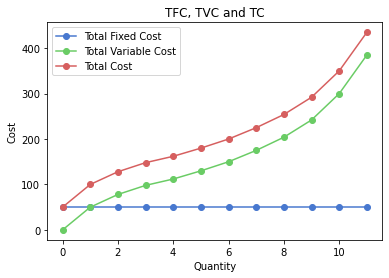

In [39]:
plt.plot(individual_firm_costs.column("Output"), individual_firm_costs.column("Total Fixed Cost"), marker='o')
plt.plot(individual_firm_costs.column("Output"), individual_firm_costs.column("Total Variable Cost"), marker='o')
plt.plot(individual_firm_costs.column("Output"), individual_firm_costs.column("Total Cost"), marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('TFC, TVC and TC')
plt.legend(make_array("Total Fixed Cost","Total Variable Cost","Total Cost"))

plt.show()

What have we observed?

1. TFC is flat
2. Vertical difference between TVC and TC is TFC, which is constant

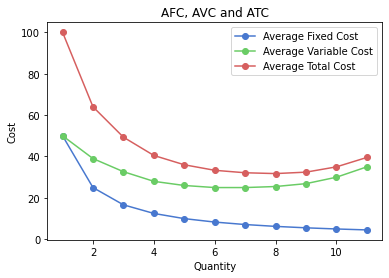

In [40]:
plt.plot(individual_firm_costs.column("Output")[1:], individual_firm_costs.column("Average Fixed Cost")[1:], marker='o')
plt.plot(individual_firm_costs.column("Output")[1:], individual_firm_costs.column("Average Variable Cost")[1:], marker='o')
plt.plot(individual_firm_costs.column("Output")[1:], individual_firm_costs.column("Average Total Cost")[1:], marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('AFC, AVC and ATC')
plt.legend(make_array("Average Fixed Cost","Average Variable Cost","Average Total Cost"))

plt.show()

In [46]:
# You do not need to understand what the code below is doing. 
output = individual_firm_costs.column("Output")[1:]
mc = individual_firm_costs.column("Marginal Cost")[1:]
avc = individual_firm_costs.column("Average Variable Cost")[1:]
atc = individual_firm_costs.column("Average Total Cost")[1:]

sp_mc = csaps(output, mc, output, smooth=0.85)
#sp_avc = csaps.UnivariateCubicSmoothingSpline(output, avc, smooth=0.85)
#sp_atc = csaps.UnivariateCubicSmoothingSpline(output, atc, smooth=0.85)

output_s = np.linspace(output.min(), output.max(), 150)
mc_s = sp_mc(output_s)
avc_s = sp_avc(output_s)
atc_s = sp_atc(output_s)

plt.plot(output, mc, marker = 'o', color = 'tab:blue')
plt.plot(output_s, mc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:blue')
plt.plot(output, avc, marker = 'o', color = 'tab:green')
plt.plot(output_s, avc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:green')
plt.plot(output, atc, marker = 'o', color = 'tab:orange')
plt.plot(output_s, atc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:orange')
plt.hlines(y=min(avc), xmin = 6, xmax = 8, lw=3, color='r', zorder = 10)
plt.hlines(y=min(atc), xmin = 7.5, xmax = 9.5, lw=3, color='r', zorder = 10)
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('MC, AVC and ATC')
plt.legend(make_array("Marginal Cost","Average Variable Cost","Average Total Cost"))

plt.show()

TypeError: 'module' object is not callable

Notice something important: _A company decides to produce if it the price is greater than or equal to its Average Variable Cost._

There are 3 different scenarios:
1. A firm chooses to not produce at all
2. A firm chooses to produce at a loss (minimizing quantity)
3. A firm chooses to produce at a profit. 

Play around with the slider to see them.

interactive(children=(IntSlider(value=25, description='price', max=60, min=20), Output()), _dom_classes=('widg…

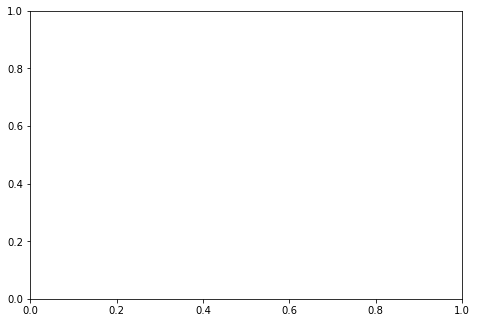

In [42]:
interact(lambda price: firm_behaviour(price, individual_firm_costs), price=widgets.IntSlider(min=20,max=60,step=1,value=25));

In the above example if the price is 24 for any amount of production, the firm will lose money. In this case, they shut down and the loss is limited to its fixed costs.

If the price is above the minimum of the AVC (25 in the example), for some amount of production, the firm will maximise its profits (i.e. minimise its losses). Profits are Total Revenue minus Total Costs, where Total Revenue is Price times Quantity.

Therefore, based on the price, each firm looks at its costs and makes a decision on whether to produce. At low prices, only the firms with the lowest production costs produce. As the price increases, firms with higher production costs find it feasible to produce and begin to supply. Thus, the market supply rises with higher prices. Firms with lower costs make extra profits. 

### Let's look at a real life example! This comes from **EEP 147 Regulation of Energy and the Environment**. 

In [ ]:
ESG_table = Table.read_table('ESGPorfolios_forcsv.csv').select(
    "Group", "Group_num", "UNIT NAME", "Capacity_MW", "Total_Var_Cost_USDperMWH").sort(
    "Total_Var_Cost_USDperMWH", descending = False).relabel(4, "Average Variable Cost")

In [ ]:
ESG_table

This table shows some electricity generation plants in California and their costs. The Capacity is the output the firm is capable of producing. The Average Variable Cost shows the minimum variable cost per MW produced. At a price below AVC, the firm supplies nothing. At a price above the AVC, the firm can supply up to its capacity. Being a profit-maximising firm, it will try to supply its full capacity.

First, let's look at just the Big Coal producers, a portfolio of electricity producing plants, and understand the data.

In [ ]:
selection = 'Big Coal'
Group = ESG_table.where("Group", selection)

In [ ]:
Group

In [ ]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x_group, height_group, width=width_group, edgecolor = "black")
# Add title and axis names
plt.title(selection)
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost/Price')

plt.show()

This figure is the Big Coal Supply curve. It shows the price of electricity, and the quantity supplied at those prices (which depends on Variable Cost). For example, at any Variable Cost at or above 36.5, the producer FOUR CORNERS	(the one with the lowest production costs) will supply, and so on.

Let's interact with it by changing the market price.

In [ ]:
interact(group_plot, price=widgets.IntSlider(min=20,max=80,step=1,value=37));

We are going to repeat the same process, this time for all the energy sources. They have been colored according to production group.

In [ ]:
interact(ESG_plot, price=widgets.IntSlider(min=0,max=90,step=1,value=37));

### Energy manipulation for profit (In class demo)

In [ ]:
def modified_profit(price, tbl):
    tbl = tbl.where("Average Variable Cost", are.below_or_equal_to(price))
    profit_per_unit = price - tbl.column("Average Variable Cost") 
    profit_per_plant = profit_per_unit * tbl.column("Capacity_MW")
    tbl = tbl.with_columns("profit_per_unit", profit_per_unit, 
                          "profit_per_plant", profit_per_plant)
    print("Price", price)
    print("Total Profit", sum(profit_per_plant))
    return tbl

In [ ]:
Group

In [ ]:
modified_profit(45, Group)

In [ ]:
Group_wo_hun = Group.take(make_array(0,2,3, 4,5))
Group_wo_hun

In [ ]:
interact(ESG_plot_wo_hun, price=widgets.IntSlider(min=0,max=90,step=1,value=37));

In [ ]:
modified_profit(50, Group_wo_hun)